## Numpy

In [52]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [53]:
import random
import time

random_list = [random.randint(0, 100) for _ in range(10000)]
start_time = time.perf_counter()
result = [x + 1 for x in random_list]
end_time = time.perf_counter()
print(f'Czas: {end_time - start_time:.5f} s')

random_list_np = np.random.randint(0, 100, size=10000)
start_time_np = time.perf_counter()
result_np = random_list_np + 1
end_time_np = time.perf_counter()

print(f'Czas: {end_time_np - start_time_np:.5f} s')

Czas: 0.00024 s
Czas: 0.00005 s


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [54]:
from math import sin, cos, pi

random_list = [random.uniform(0, 2 * pi) for _ in range(10000)]
start_time = time.perf_counter()
result = [sin(x) + cos(x) for x in random_list]
end_time = time.perf_counter()
print(f'Czas: {end_time - start_time:.6f} s')


random_array_np = np.random.uniform(0, 2 * np.pi, size=10000)
start_time_np = time.perf_counter()
result_np = np.sin(random_array_np) + np.cos(random_array_np)
end_time_np = time.perf_counter()
print(f'Czas: {end_time_np - start_time_np:.6f} s')



Czas: 0.001272 s
Czas: 0.000322 s


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [55]:
import time

def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def cube_sum_np(x):
    x = np.array(x)
    return (x ** 3).sum()

def almost_variance_np(x):
    x = np.array(x)
    m = x.mean()
    return ((x - m) ** 4).sum() / len(x)

# testy
random_list = [random.uniform(0, 100) for _ in range(10000)]

start_time = time.perf_counter()
result = cube_sum(random_list)
end_time = time.perf_counter()
print(f'Czas zwykłej: {end_time - start_time:.6f} s')

start_time = time.perf_counter()
result = cube_sum_np(random_list)
end_time = time.perf_counter()
print(f'Czas np: {end_time - start_time:.6f} s')


start_time = time.perf_counter()
result = almost_variance(random_list)
end_time = time.perf_counter()
print(f'Czas zwykłej: {end_time - start_time:.6f} s')

start_time = time.perf_counter()
result = almost_variance_np(random_list)
end_time = time.perf_counter()
print(f'Czas np: {end_time - start_time:.6f} s')

Czas zwykłej: 0.001166 s
Czas np: 0.000726 s
Czas zwykłej: 0.001291 s
Czas np: 0.000651 s


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [56]:
indices = np.arange(1, 11)
A = indices[:, np.newaxis] * indices
print(A)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [57]:
points = np.random.rand(10, 5)
distances = np.linalg.norm(points[:, np.newaxis, :] - points, axis=-1)
print(distances)

[[0.         0.78168509 0.60307886 0.6743467  0.4638994  0.92244686
  0.55186403 1.09917365 0.59472272 0.89656683]
 [0.78168509 0.         0.67409021 0.61232902 1.15757257 1.04353296
  1.03433715 0.81995942 0.95060373 0.98195417]
 [0.60307886 0.67409021 0.         0.75218456 0.86151185 1.30248518
  0.59378678 1.17561535 0.81987223 1.28610071]
 [0.6743467  0.61232902 0.75218456 0.         0.91289258 1.0297269
  1.07394546 1.09514571 0.54244476 0.99715522]
 [0.4638994  1.15757257 0.86151185 0.91289258 0.         0.99511032
  0.60544642 1.30695154 0.51049149 1.00927037]
 [0.92244686 1.04353296 1.30248518 1.0297269  0.99511032 0.
  1.15588016 0.6659412  0.94398968 0.5638313 ]
 [0.55186403 1.03433715 0.59378678 1.07394546 0.60544642 1.15588016
  0.         1.16759128 0.8871943  1.2456107 ]
 [1.09917365 0.81995942 1.17561535 1.09514571 1.30695154 0.6659412
  1.16759128 0.         1.19317783 0.98032295]
 [0.59472272 0.95060373 0.81987223 0.54244476 0.51049149 0.94398968
  0.8871943  1.1931778

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [58]:
X = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]])
mean = X.mean(axis=0)
std = X.std(axis=0)
print((X - mean) / std)

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [59]:
A = np.array([1, -4, 3])
differences = np.abs(A - 1.5)
index = np.argmin(differences)
print(A[index])

1


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [60]:
def poly(x, a):
    return sum(a[i] * x ** i for i in range(len(a)))

poly(2, [1, 2, 3])

17

## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

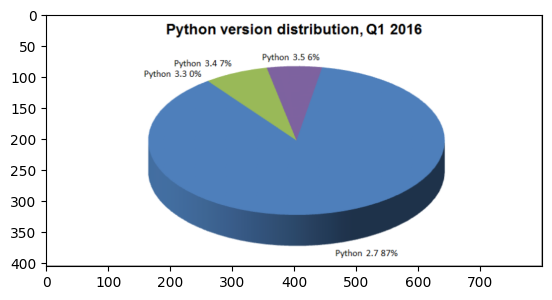

In [62]:
img = mpimg.imread('images/pie.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

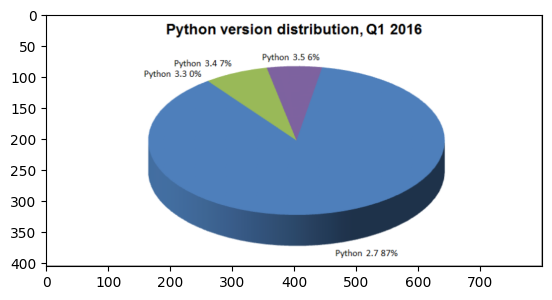

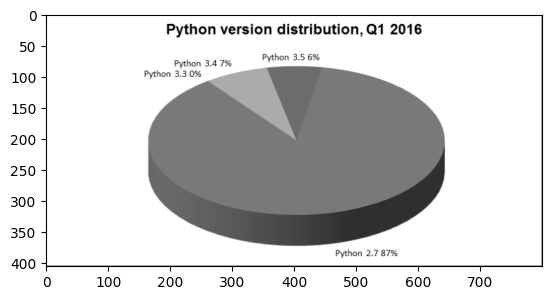

In [63]:
def convert_to_grayscale(image):
    height, width, _ = image.shape
    grayscale_image = np.zeros((height, width))

    for row in range(height):
        for col in range(width):
            red, green, blue = image[row, col]
            grayscale_value = 0.2126 * red + 0.7152 * green + 0.0722 * blue
            grayscale_image[row, col] = grayscale_value

    return grayscale_image

image = mpimg.imread('images/pie.png')
grayscale_image = convert_to_grayscale(image)
plt.imshow(image)
plt.show()
plt.imshow(grayscale_image, cmap='gray')
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [64]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
lambdas = np.linspace(0, 1, 10)
lambdas_matrix = np.repeat(lambdas[:, np.newaxis], x1.shape[0], axis=1)
interpolation = lambdas_matrix * x1 + (1 - lambdas_matrix) * x2
print(interpolation)


[[4.         5.         6.        ]
 [3.66666667 4.66666667 5.66666667]
 [3.33333333 4.33333333 5.33333333]
 [3.         4.         5.        ]
 [2.66666667 3.66666667 4.66666667]
 [2.33333333 3.33333333 4.33333333]
 [2.         3.         4.        ]
 [1.66666667 2.66666667 3.66666667]
 [1.33333333 2.33333333 3.33333333]
 [1.         2.         3.        ]]
